In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

from borfr import BO_RFR, fps
import warnings
warnings.filterwarnings("ignore")

grid = np.load('kmc_data/grid.npy')
ref_labels = np.load('kmc_data/labels.npy')
vals = np.load('kmc_data/rates.npy')

In [4]:
def f(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return vals[ind]

def get_label(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return ref_labels[ind]

x = y = np.linspace(-1,1,50)
mesh = np.meshgrid(x,y)
xy = np.vstack([m.ravel() for m in mesh]).T

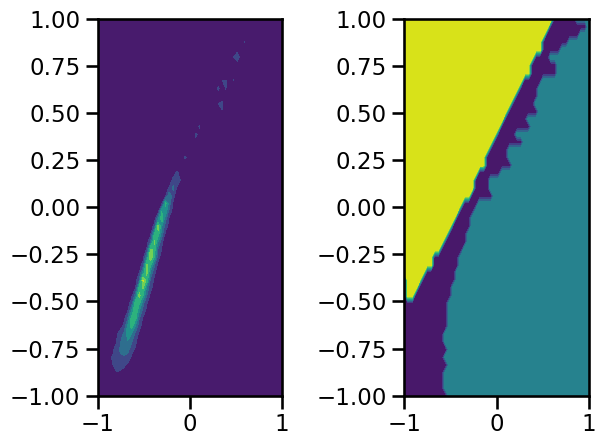

In [5]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax1.contourf(*mesh, np.array([f(xi) for xi in grid]).reshape(mesh[0].shape))
ax2.contourf(*mesh, np.array([get_label(xi) for xi in grid]).reshape(mesh[0].shape))
plt.tight_layout()

In [7]:
X_init = fps(grid,4)
y_init = np.array([f(xi) for xi in X_init])

x_test = grid


#np.random.seed(5)

regm = 'RFC'
clm = 'RFC'

esl = 'known'

n_iter = 150
nb = 1
n_iter_b = int(n_iter/nb)

bor = BO_RFR(X_init, y_init, grid, f, x_test, 
             acq='BO',gl = get_label, cl_weight=.3, 
             est_labels=esl, N_batch=nb, 
             class_method = clm, reg_method = regm, k_adaptive=True)

bor.run(n_iter_b)

rand_scores = []
for i in range(3):
    rand = BO_RFR(X_init, y_init, grid, f, x_test, 
                  acq='random',gl = get_label,  
                  est_labels=esl, N_batch=1,
                  class_method = clm, reg_method = regm)
    
    rand.run(n_iter)
    rand_scores.append(rand.scores)


sf = BO_RFR(X_init, y_init, grid, f, x_test, 
            acq='SF',gl = get_label, 
            est_labels=esl, N_batch=1,
            class_method = clm, reg_method = regm)

sf.run(n_iter)

gp = BO_RFR(X_init, y_init, grid, f, x_test, 
            acq='SF',gl = get_label, 
            est_labels=esl, N_batch=1,
            class_method = clm, reg_method = regm, gpr=True)

gp.run(n_iter)

generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 66990.53it/s]

running iterative exploration:



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:53<00:00,  2.82it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 68216.48it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:44<00:00,  3.34it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 65608.99it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:45<00:00,  3.27it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 66166.65it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:45<00:00,  3.28it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 65074.78it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:46<00:00,  3.24it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 66380.27it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:31<00:00,  4.80it/s]


In [23]:
regm = 'ORFC'
clm = 'ORFC'

esl = 'AC'

n_iter = 150
nb = 2
n_iter_b = int(n_iter/nb)

bor = BO_RFR(X_init, y_init, grid, f, x_test, 
             acq='BO',gl = get_label, cl_weight=1.3, 
             est_labels=esl, N_batch=nb, 
             class_method = clm, reg_method = regm, k_adaptive=True)

bor.run(n_iter_b)

generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 57983.31it/s]

running iterative exploration:



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:32<00:00,  2.29it/s]


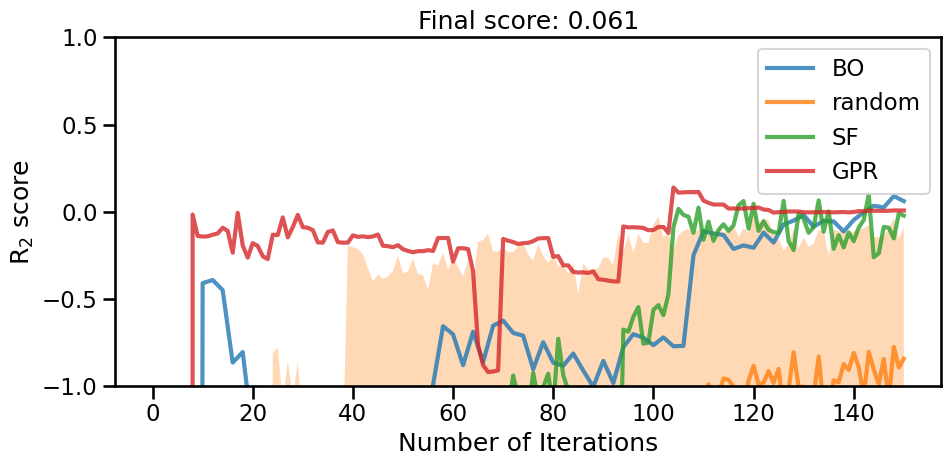

In [24]:
fig, ax2 = plt.subplots(ncols=1, figsize=(10,5))

ax2.plot(np.arange(bor.n_iters+1)*nb,bor.scores,lw=3,alpha=0.8, label='BO')
try:
    ax2.plot(np.arange(rand.n_iters+1),np.mean(rand_scores,axis=0),lw=3,alpha=0.8, label='random')
    #ax2.fill_between(np.arange(rand.n_iters+1),np.mean(rand_scores,axis=0)-np.std(rand_scores,axis=0),
    #                 np.mean(rand_scores,axis=0)+np.std(rand_scores,axis=0), alpha=0.3, fc='C1')
    ax2.fill_between(np.arange(rand.n_iters+1),np.percentile(rand_scores,5,axis=0),
                     np.percentile(rand_scores,95,axis=0), alpha=0.3, fc='C1')
except:
    pass

try:
    ax2.plot(np.arange(sf.n_iters+1),sf.scores,lw=3,alpha=0.8, label='SF')
except:
    pass

try:
    ax2.plot(np.arange(gp.n_iters+1),gp.scores,lw=3,alpha=0.8, label='GPR')
except:
    pass
ax2.set_title('Final score: %.3f'%bor.scores[-1])
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('R$_2$ score')
ax2.set_ylim(-1,1)
ax2.legend()
plt.tight_layout()

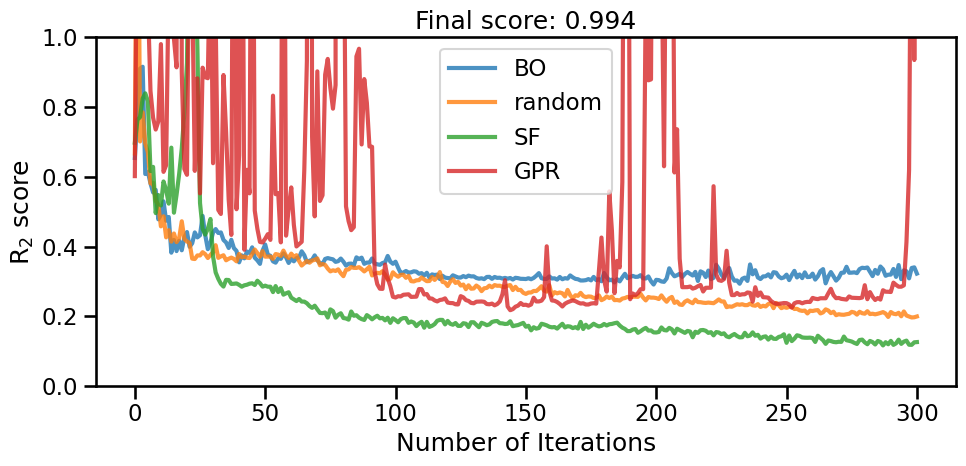

In [8]:
fig, ax2 = plt.subplots(ncols=1, figsize=(10,5))

si = 2

ax2.plot(np.arange(bor.n_iters+1)*nb,np.array(bor.all_scores)[:,si],lw=3,alpha=0.8, label='BO')
try:
    ax2.plot(np.arange(rand.n_iters+1),np.array(rand.all_scores)[:,si],lw=3,alpha=0.8, label='random')
    #ax2.fill_between(np.arange(rand.n_iters+1),np.mean(rand_scores,axis=0)-np.std(rand_scores,axis=0),
    #                 np.mean(rand_scores,axis=0)+np.std(rand_scores,axis=0), alpha=0.3, fc='C1')
except:
    pass

try:
    ax2.plot(np.arange(sf.n_iters+1),np.array(sf.all_scores)[:,si],lw=3,alpha=0.8, label='SF')
except:
    pass

try:
    ax2.plot(np.arange(gp.n_iters+1),np.array(gp.all_scores)[:,si],lw=3,alpha=0.8, label='GPR')
except:
    pass
ax2.set_title('Final score: %.3f'%bor.scores[-1])
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('R$_2$ score')
ax2.set_ylim(0,1)
ax2.legend()
plt.tight_layout()

In [54]:
bor = BO_RFR(X_init, y_init, grid, f, x_test, gl = get_label, cl_weight=0.3, est_labels='known', N_batch=8)

bor.run(25)

generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 50766.21it/s]

running iterative exploration:



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.84it/s]


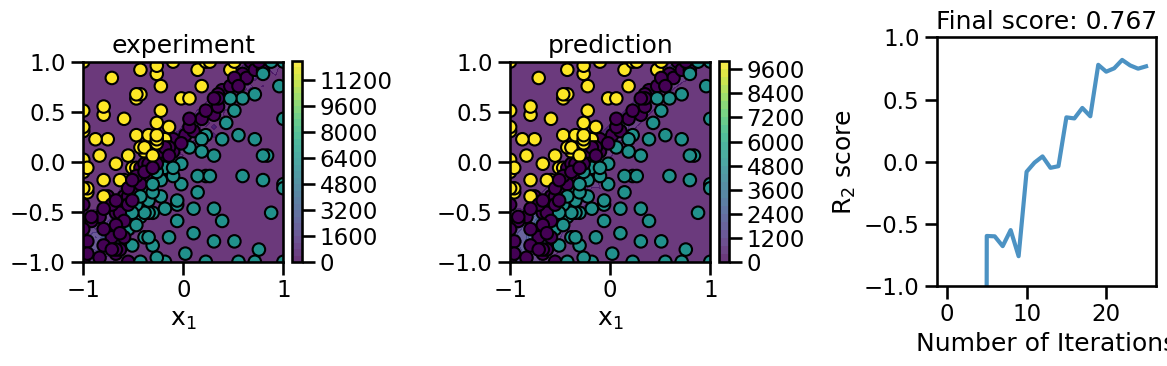

In [55]:
fig,axes = plt.subplots(ncols=3, figsize=(12,4))
ax = axes[0]
a = ax.contourf(*mesh, vals.reshape(mesh[0].shape), levels=30, alpha=0.8)
plt.colorbar(a,fraction=0.046, pad=0.04)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('experiment')
ax = axes[1]
a = ax.contourf(*mesh, bor.model.predict(grid).reshape(mesh[0].shape), levels=30, alpha=0.8)
plt.colorbar(a,fraction=0.046, pad=0.04)
ax.scatter(*bor.X.T, ec='k',c=bor.labels)
ax.set_aspect('equal')
ax.set_xlabel('x$_0$')
ax.set_xlabel('x$_1$')
ax.set_title('prediction')
ax = axes[2]
ax.plot(np.arange(bor.n_iters+1),bor.scores,lw=3,alpha=0.8,)
ax.set_title('Final score: %.3f'%bor.scores[-1])
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('R$_2$ score')
ax.set_ylim(-1,1)
plt.tight_layout()

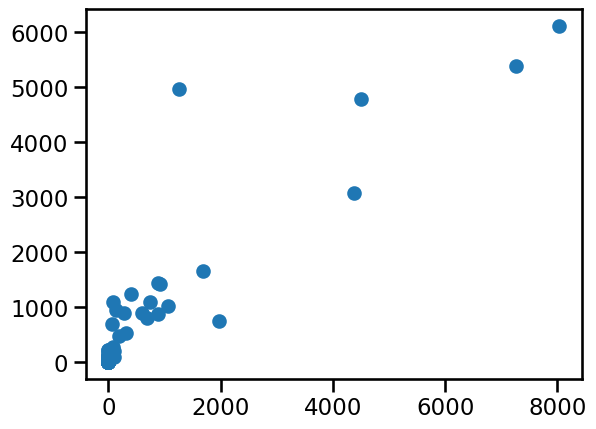

In [56]:
fig,ax = plt.subplots()
ax.scatter(np.array([f(xi) for xi in x_test]), bor.model.predict(x_test))

In [57]:
from treeple import PatchObliqueRandomForestRegressor, ObliqueRandomForestRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
pred = PatchObliqueRandomForestRegressor().fit(bor.X,bor.y).predict(x_test)
print(r2_score(pred, np.array([f(xi) for xi in x_test])))
pred = ObliqueRandomForestRegressor().fit(bor.X,bor.y).predict(x_test)
print(r2_score(pred, np.array([f(xi) for xi in x_test])))
pred = RandomForestRegressor().fit(bor.X,bor.y).predict(x_test)
print(r2_score(pred, np.array([f(xi) for xi in x_test])))

0.3267905663695698
0.7665086577826149
0.5891646202686199
